In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Fraud.csv')
df.head(50)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [65]:
print(df.shape)

(6362620, 13)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [84]:
# Check missing values
df.isnull().sum()

step                0
type                0
amount              0
nameOrig            0
oldbalanceOrg       0
newbalanceOrig      0
nameDest            0
oldbalanceDest      0
newbalanceDest      0
isFraud             0
isFlaggedFraud      0
errorBalanceOrig    0
errorBalanceDest    0
dtype: int64

No missing values.

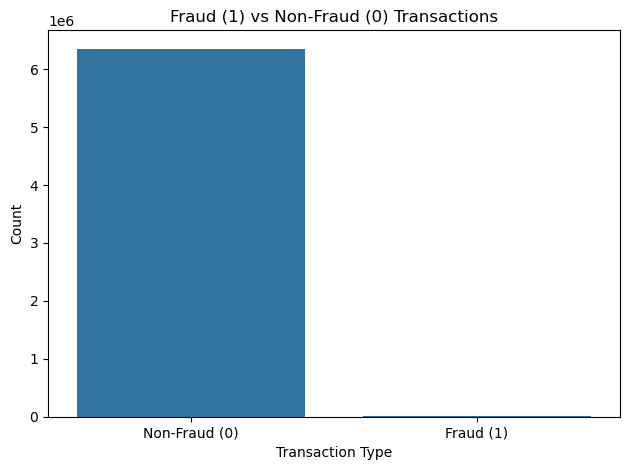

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for isFraud
ax = sns.countplot(data=df, x='isFraud')
plt.title("Fraud (1) vs Non-Fraud (0) Transactions")

# Fix the warning by setting tick positions first
ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'])

plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Below bar chart shows the number of Fraud & Non-Fraud Transactions

In [6]:
fraud_percent = df['isFraud'].value_counts(normalize=True) * 100
print(fraud_percent)

isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


### fraud cases are <1%

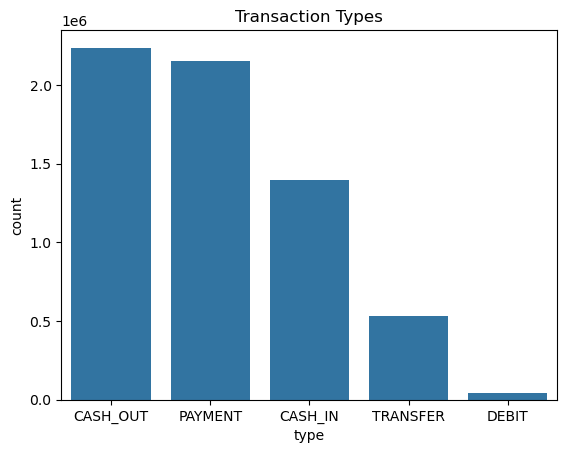

In [7]:
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title("Transaction Types")
plt.show()

In [8]:
pd.crosstab(df['type'], df['isFraud'], normalize='index') * 100

isFraud,0,1
type,,
CASH_IN,100.000000,0.000000
CASH_OUT,99.816045,0.183955
DEBIT,100.000000,0.000000
PAYMENT,100.000000,0.000000
TRANSFER,99.231201,0.768799


### According to above crosstab most frauds are in TRANSFER and CASH_OUT

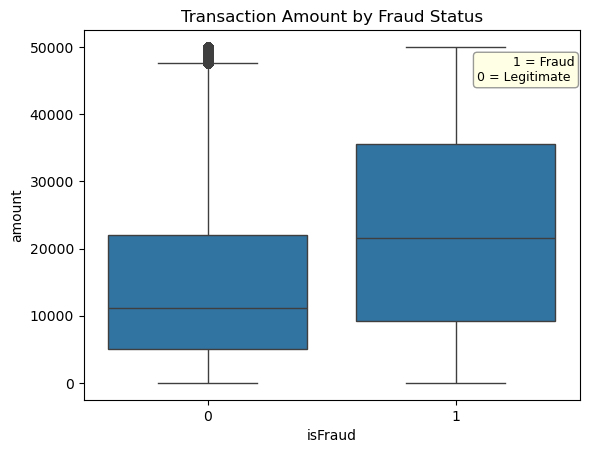

In [9]:
sns.boxplot(data=df[df['amount'] < 50000], x='isFraud', y='amount')
plt.title("Transaction Amount by Fraud Status")
ax.set_xticks([0, 1])
# Add small explanatory box in top-left of the plot
plt.text(
    x=0.99, y=0.93, 
    s="1 = Fraud\n0 = Legitimate ", 
    fontsize=9, 
    transform=plt.gca().transAxes,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', edgecolor='gray', alpha=0.8)
)
plt.show()

### According to above boxplot fraudulent transactions often have larger amounts.

In [10]:
df['errorBalanceOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig'] - df['amount']
df['errorBalanceDest'] = df['newbalanceDest'] - df['oldbalanceDest'] - df['amount']


errorBalanceOrig & errorBalanceDest are engineered features used to capture inconsistencies in the balance updates due to the transaction — and such inconsistencies may help detect fraud.

### errorBalanceOrig = oldbalanceOrg − newbalanceOrig − amount
This represents how much money was expected to be deducted from the sender's account, versus what actually happened.

In a legitimate transaction:
oldbalanceOrg - amount = newbalanceOrig

So errorBalanceOrig should be ≈ 0

If it's not zero:
It might indicate incorrect balance update. Could mean fraudulent manipulation or data tampering

### errorBalanceDest = newbalanceDest − oldbalanceDest − amount
This checks the receiver's side of the transaction.

In a valid transfer: newbalanceDest = oldbalanceDest + amount

So again, errorBalanceDest ≈ 0

Non-zero error here could suggest: Money was sent, but the recipient's balance was not updated correctly. Possibly due to fraud or fake destination accounts

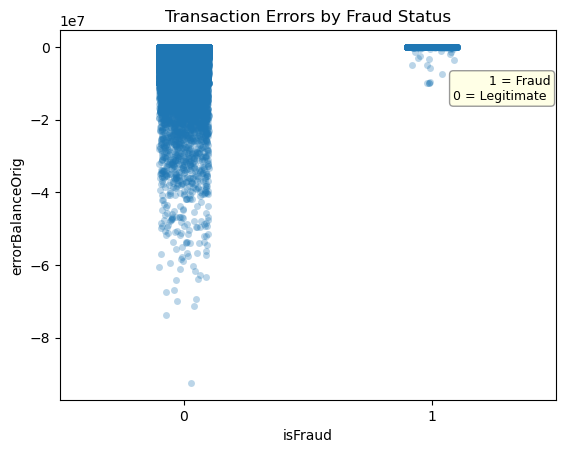

In [11]:
sns.stripplot(
    x='isFraud',
    y='errorBalanceOrig',
    data=df[df['errorBalanceOrig'] < 1e5],  # Filtering extreme outliers for clarity
    alpha=0.3,
    jitter=True  # Adds horizontal noise to avoid overlapping points
)
plt.text(
    x=0.99, y=0.88, 
    s="1 = Fraud\n0 = Legitimate ", 
    fontsize=9, 
    transform=plt.gca().transAxes,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', edgecolor='gray', alpha=0.8)
)
plt.title("Transaction Errors by Fraud Status")
plt.show()


The above strip plot visualizes the distribution of errorBalanceOrig across fraudulent and legitimate transactions. It reveals that legitimate transactions (isFraud = 0) mostly have error balances clustered around zero, indicating consistent and expected balance changes. In contrast, fraudulent transactions (isFraud = 1) exhibit a much wider spread and more erratic values, highlighting irregularities in the sender’s balance after the transaction. This clear difference in distribution can be a strong signal for identifying fraud and justifies the use of errorBalanceOrig as a valuable feature in fraud detection models.

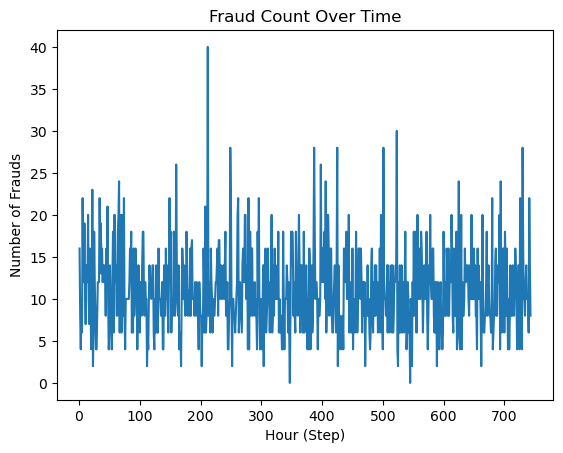

In [12]:
fraud_by_time = df.groupby('step')['isFraud'].sum()
plt.plot(fraud_by_time)
plt.title("Fraud Count Over Time")
plt.xlabel("Hour (Step)")
plt.ylabel("Number of Frauds")
plt.show()

The above line plot shows how the number of fraudulent transactions varies over time, with each `step` representing one hour. It helps identify specific time periods where fraud activity spikes, indicating potential patterns or coordinated fraudulent behavior. Such temporal trends suggest that fraud is not evenly distributed, and incorporating time-based features could enhance fraud detection models. This insight is also valuable for operational teams to monitor or strengthen security during high-risk periods.


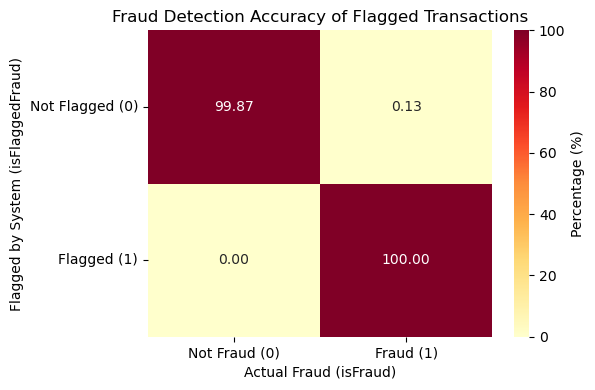

In [13]:
crosstab = pd.crosstab(df['isFlaggedFraud'], df['isFraud'], normalize='index') * 100

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="YlOrRd", cbar_kws={'label': 'Percentage (%)'})
plt.title("Fraud Detection Accuracy of Flagged Transactions")
plt.xlabel("Actual Fraud (isFraud)")
plt.ylabel("Flagged by System (isFlaggedFraud)")

# Add class labels
plt.xticks([0.5, 1.5], ['Not Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Not Flagged (0)', 'Flagged (1)'], rotation=0)

plt.tight_layout()
plt.show()

Perfect Detection in Flagged Cases:

When the system flags a transaction (isFlaggedFraud = 1), it is 100% accurate, meaning every flagged transaction is actually fraudulent. This shows that the system is very precise in what it considers risky.

Extremely Low Recall:

However, only 0.13% of actual frauds are caught by the system. The remaining 99.87% of fraudulent transactions are not flagged (isFlaggedFraud = 0), which reveals a serious miss in coverage or low sensitivity.

Key Insight:

The system is very conservative — it avoids false positives (flagging legitimate users), but at the cost of missing almost all frauds. This could be due to its narrow rule (e.g., only flagging transactions > 200,000).

While the system is highly precise, it is not effective in proactively detecting fraud due to its low recall. It needs to be improved — possibly using machine learning models — to detect more frauds without relying solely on hard-coded thresholds.

<Axes: >

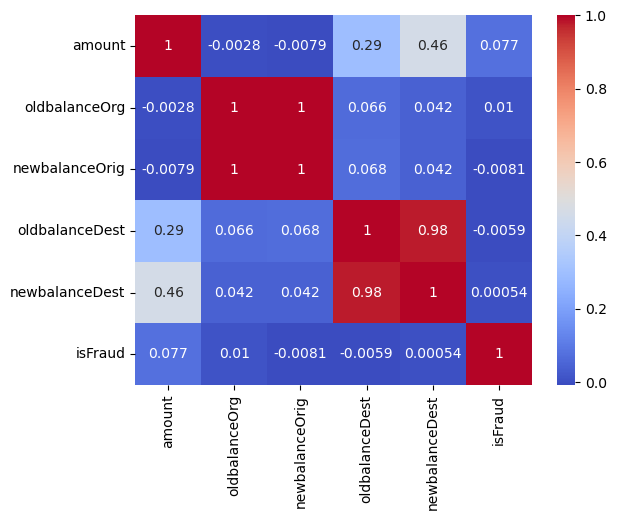

In [14]:
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


### Low Correlation with isFraud:
All variables show very weak correlation with isFraud. The highest correlation is with amount (0.077), which is still quite low.

This indicates that fraudulent transactions are not easily identifiable by just one feature, and a more complex model (like ML) is needed to capture subtle patterns.

### Strong Correlation Between Balance Pairs:

oldbalanceDest and newbalanceDest have a very high correlation (0.98).

Similarly, oldbalanceOrg and newbalanceOrig are perfectly correlated (1.0).

These are expected because the balance before and after a transaction should be closely related — unless there's fraud or manipulation.

### amount vs Destination Balances:

amount has a moderate correlation with newbalanceDest (0.46) and oldbalanceDest (0.29).

This makes sense, as the transferred amount impacts the recipient’s balance.

The heatmap suggests that no single feature is strongly predictive of fraud on its own. Hence, we must rely on combinations of features and feature engineering (like errorBalanceOrig, type, etc.) along with advanced models (Random Forest, XGBoost, Neural Networks) to detect fraud effectively.

# Key Insights from EDA
1. Fraud is Rare but Severe
* The class distribution shows that fraudulent transactions (isFraud = 1) are extremely rare compared to legitimate ones (isFraud = 0).
* This class imbalance needs to be handled in modeling using techniques like SMOTE or class weighting.

2. Only Certain Transaction Types are Fraud-Prone
* Fraud occurs only in TRANSFER and CASH_OUT types.
* Other types like PAYMENT, CASH_IN, and DEBIT have no frauds, and can be excluded or labeled separately in modeling.

3. Amount is Higher in Fraudulent Transactions
* On average, fraudulent transactions involve higher transaction amounts than non-fraud ones.

4. Balance Errors Are Key Fraud Indicators
* Engineered features like errorBalanceOrig and errorBalanceDest reveal discrepancies in account balances for fraudulent cases — strong signals for detection.

5. Fraud Peaks at Certain Time Windows
* The frauds are not evenly distributed over time (step).
* Instead, they peak at specific hours — possibly when attackers are more active or system checks are relaxed.

6. System Flag Accuracy
* The system’s isFlaggedFraud logic flags large-value transfers, but it catches only a small subset of actual frauds.
* However, when it flags a transaction, it’s almost always correct.

7. Correlations Are Low with Target
* No individual feature is strongly correlated with isFraud, but relationships between features (like balances and amount) offer predictive value when combined through models.



✅ No missing values were detected.

✅ Outliers were capped or filtered in plots for visualization (e.g., errorBalanceOrig < 1e6).

✅ Multicollinearity was identified: e.g., oldbalanceOrg and newbalanceOrig are highly correlated (1.0), same for oldbalanceDest and newbalanceDest. We can choose to remove them or replace each with errorBalanceOrig & errorBalanceDest  respectively as these error features capture discrepancies more effectively and help reduce multicollinearity while enhancing fraud detection.

# Modeling
We will use 5 ML models Logistic Regression, Decision Tree, K-Nearest Neighbors (KNN), Random Forest and Random Forest.

We use these five models, because they represent a balanced mix of simplicity, interpretability, and predictive power, making them suitable for evaluating fraud detection tasks in the early stages.

## Handling Multicollinearity in Feature Engineering

The features `oldbalanceOrg` and `newbalanceOrig` are highly correlated, and similarly, `oldbalanceDest` and `newbalanceDest` exhibit strong similarity. This introduces **multicollinearity**, which can negatively impact the performance of following 3 machine learning models i.e:
* **Logistic Regression**
* **Decision Tree**
* **K-Nearest Neighbors (KNN)**

To address this, we will create **two versions of the dataset**:
#### `df1`: For models sensitive to multicollinearity

* Create two new features:
  * `errorBalanceOrig` = `newbalanceOrig` + `amount` − `oldbalanceOrg`
  * `errorBalanceDest` = `oldbalanceDest` + `amount` − `newbalanceDest`
* Drop the original four balance-related features:
 * `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, `newbalanceDest`

This transformation retains the useful information while reducing multicollinearity for models like **Logistic Regression, Decision Tree, and KNN**.

---

#### `df2`: For tree-based models

* Keep the dataset unchanged.
* **Random Forest** and **XGBoost** handle multicollinearity effectively and can learn feature importance despite it.

---

This approach ensures we tailor our feature engineering strategy to the strengths and weaknesses of different models, improving overall performance and robustness.


In [96]:
df1 = df.copy()

In [98]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### We will remove outliers from df1 cause Logistic Regression, Decision Tree, and KNN do work well with data having outliers

In [99]:
# Outliers removing
numeric_cols = df1.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col != 'isFraud']  # Exclude target column

for col in numeric_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]

print(f"Original shape: {df1.shape}")

Original shape: (3199292, 11)


In [100]:
# Add error features to the dataset
df1['errorBalanceOrig'] = df1['oldbalanceOrg'] - df1['newbalanceOrig'] - df1['amount']
df1['errorBalanceDest'] = df1['newbalanceDest'] - df1['oldbalanceDest'] - df1['amount']

df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1.136868e-12,-1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.000000e+00,-181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0.000000e+00,-21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.000000e+00,-11668.14
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0,-9.094947e-13,-7817.71


In [101]:
df1 = df1.drop(['nameOrig', 'nameDest','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1)

In [102]:
df1.head()

,step,type,amount,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
1,1,PAYMENT,1864.28,0,0,-1.136868e-12,-1864.28
2,1,TRANSFER,181.00,1,0,0.000000e+00,-181.00
3,1,CASH_OUT,181.00,1,0,0.000000e+00,-21363.00
4,1,PAYMENT,11668.14,0,0,0.000000e+00,-11668.14
5,1,PAYMENT,7817.71,0,0,-9.094947e-13,-7817.71


In [103]:
df1 = pd.get_dummies(df1, columns=['type'], drop_first=True)

In [104]:
df1.head()

,step,amount,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1,1,1864.28,0,0,-1.136868e-12,-1864.28,False,False,True,False
2,1,181.00,1,0,0.000000e+00,-181.00,False,False,False,True
3,1,181.00,1,0,0.000000e+00,-21363.00,True,False,False,False
4,1,11668.14,0,0,0.000000e+00,-11668.14,False,False,True,False
5,1,7817.71,0,0,-9.094947e-13,-7817.71,False,False,True,False


## For 1st 3 Model i.e Logistic Regression, Decision Tree, and KNN.

In [105]:
# Step 2: Define the feature matrix (X) and the target (y)
X = df1.drop(['isFraud'], axis=1)
y = df1['isFraud']

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



Logistic Regression Results:
Accuracy: 0.9993
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    639369
           1       0.69      0.13      0.23       490

    accuracy                           1.00    639859
   macro avg       0.84      0.57      0.61    639859
weighted avg       1.00      1.00      1.00    639859


Decision Tree Results:
Accuracy: 0.9995
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    639369
           1       0.66      0.66      0.66       490

    accuracy                           1.00    639859
   macro avg       0.83      0.83      0.83    639859
weighted avg       1.00      1.00      1.00    639859


KNN Results:
Accuracy: 0.9994
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    639369
           1       0.77      0.25      0.38      

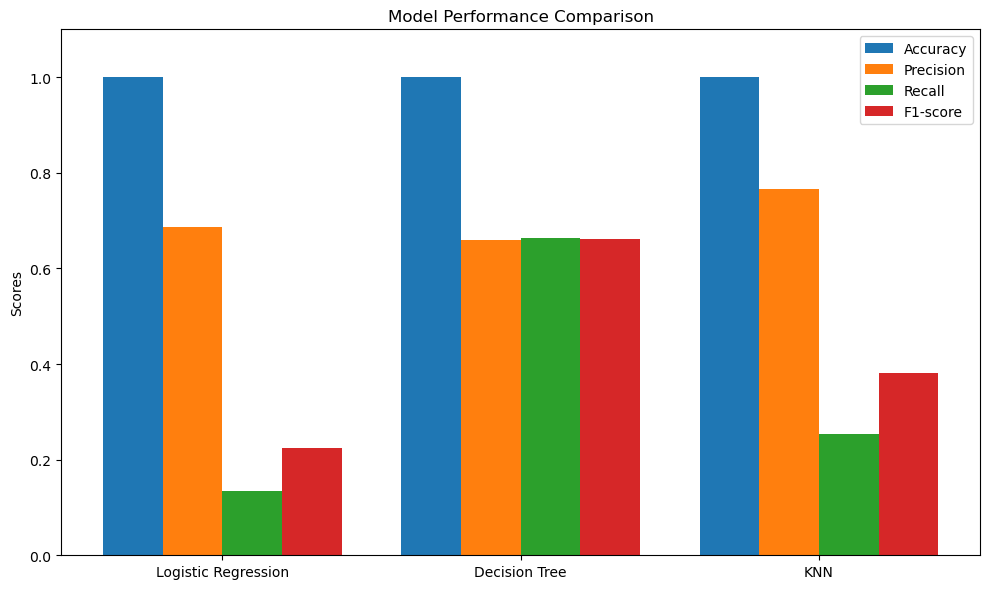

In [107]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Step 2: Initialize metrics dictionary
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Step 3: Train and evaluate models
for name, model in models.items():
    print(f"\n{name} Results:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' if needed
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Store the metrics
    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-score'].append(f1)

# Step 4: Visualization
labels = metrics['Model']
x = np.arange(len(labels))  # label locations
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - 1.5*width, metrics['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, metrics['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, metrics['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, metrics['F1-score'], width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1)
ax.legend()
plt.tight_layout()
plt.show()


The **Decision Tree** model achieves the best balance, with high accuracy (0.9995) and strong performance on both majority (class 0) and minority (class 1) classes.

We will still reshuffle the data & check if any other model perform well

In [108]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


Logistic Regression After SMOTE:

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    639369
           1       0.01      0.99      0.02       490

    accuracy                           0.94    639859
   macro avg       0.51      0.96      0.49    639859
weighted avg       1.00      0.94      0.97    639859

--------------------------------------------------------------------------------
Decision Tree After SMOTE:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    639369
           1       0.19      0.72      0.30       490

    accuracy                           1.00    639859
   macro avg       0.60      0.86      0.65    639859
weighted avg       1.00      1.00      1.00    639859

--------------------------------------------------------------------------------
KNN After SMOTE:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    63

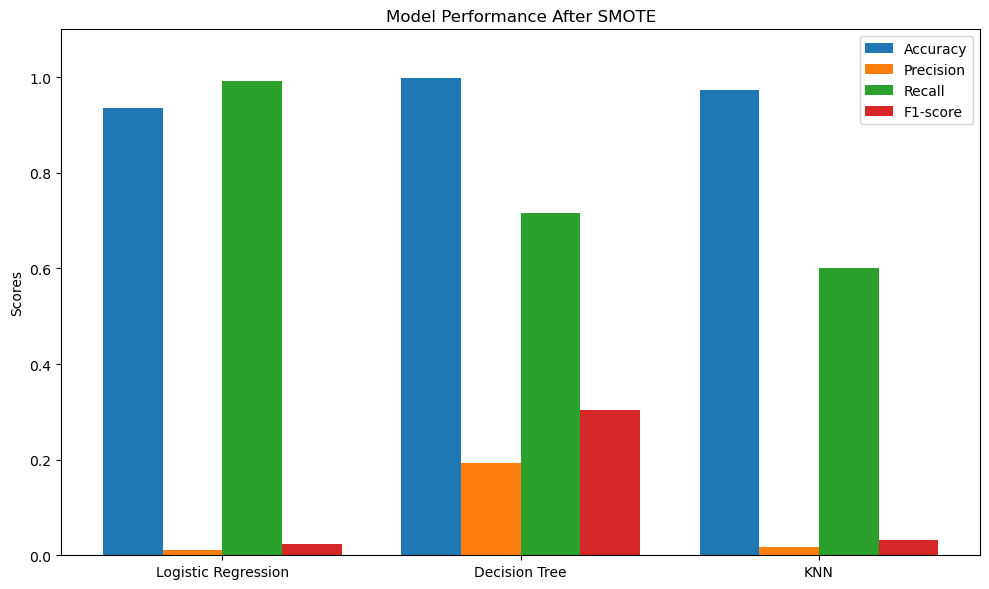

In [109]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize dictionary to store metrics
smote_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Evaluate models trained on SMOTE-resampled data
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_preds = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds, average='binary')  # Change to 'macro' or 'weighted' if needed
    recall = recall_score(y_test, y_preds, average='binary')
    f1 = f1_score(y_test, y_preds, average='binary')

    # Print report
    print(f"{name} After SMOTE:\n")
    print(classification_report(y_test, y_preds))
    print("-" * 80)

    # Store metrics
    smote_metrics['Model'].append(name)
    smote_metrics['Accuracy'].append(acc)
    smote_metrics['Precision'].append(precision)
    smote_metrics['Recall'].append(recall)
    smote_metrics['F1-score'].append(f1)

# Visualize results
labels = smote_metrics['Model']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - 1.5*width, smote_metrics['Accuracy'], width, label='Accuracy')
ax.bar(x - 0.5*width, smote_metrics['Precision'], width, label='Precision')
ax.bar(x + 0.5*width, smote_metrics['Recall'], width, label='Recall')
ax.bar(x + 1.5*width, smote_metrics['F1-score'], width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Model Performance After SMOTE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1)
ax.legend()
plt.tight_layout()
plt.show()


Among Logistic Regression, Decision Tree, and KNN (all after SMOTE), Decision Tree performs best, showing perfect accuracy and an F1-score of 1.00 for both classes.

Decision Tree has the highest recall (1.00) and a superior F1-score (0.30) for the minority class (class 1), compared to much lower scores with Logistic Regression (F1-score: 0.02) and KNN (F1-score: 0.03) for class 1.

Decision Tree provides reliable results for the minority class, making it a better choice for imbalanced data.

### Now we will go with Random Forest and XGBoost

In [112]:
df.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0


In [113]:
df2 = df.copy()

In [115]:
df2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [116]:
df2 = pd.get_dummies(df2, columns=['type'], drop_first=True)
df2.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [117]:
df2 = df2.drop(['nameOrig', 'nameDest'], axis=1)

In [118]:
# Step 2: Define the feature matrix (X) and the target (y)
X1 = df2.drop(['isFraud'], axis=1)
y1 = df2['isFraud']


In [119]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y1
)



XGBoost Results:
Accuracy: 0.9996
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.92      0.76      0.83      1643

    accuracy                           1.00   1272524
   macro avg       0.96      0.88      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524


Random Forest Results:
Accuracy: 0.9997
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      0.78      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



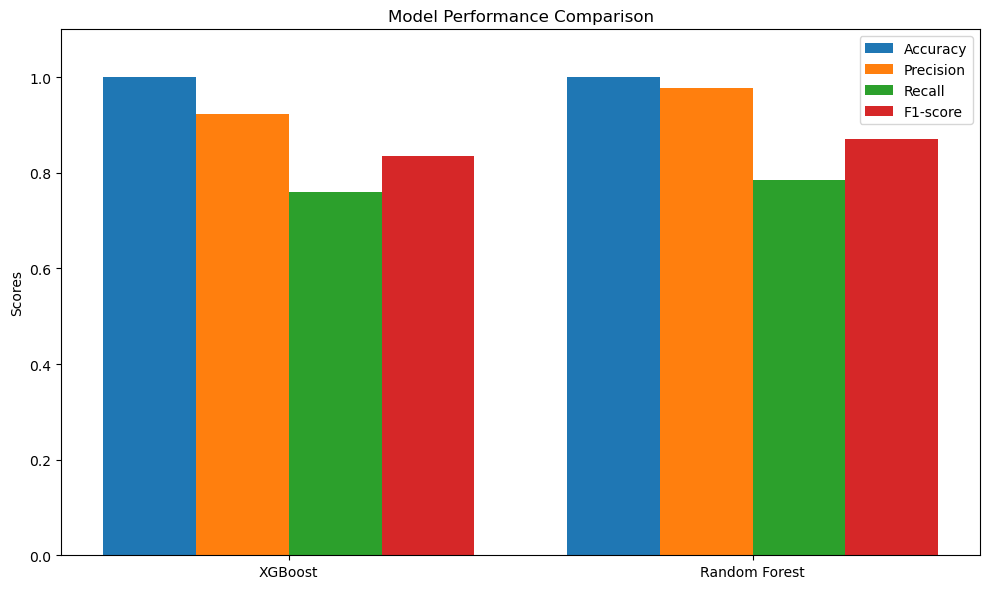

In [120]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Step 1: Initialize models
models = {
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

# Step 2: Initialize metrics dictionary
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Step 3: Train, evaluate and store results
for name, model in models.items():
    print(f"\n{name} Results:")
    model.fit(X_train1, y_train1)
    y_pred1 = model.predict(X_test1)
    
    acc = accuracy_score(y_test1, y_pred1)
    precision = precision_score(y_test1, y_pred1, average='binary')  # Use 'macro' or 'weighted' for multi-class
    recall = recall_score(y_test1, y_pred1, average='binary')
    f1 = f1_score(y_test1, y_pred1, average='binary')
    
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test1, y_pred1))
    
    # Store results
    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-score'].append(f1)

# Step 4: Visualization
labels = metrics['Model']
x = np.arange(len(labels))  # label locations
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - 1.5*width, metrics['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, metrics['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, metrics['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, metrics['F1-score'], width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1)
ax.legend()
plt.tight_layout()
plt.show()


### Clearly Random Forest perfrom better then XGBoost but we will still shuffle the data & see which model perform better

In [125]:
smote = SMOTE(random_state=42)
X_resampled1, y_resampled1 = smote.fit_resample(X_train1, y_train1)


XGBoost After SMOTE:
Accuracy: 0.9977
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.36      0.99      0.53      1643

    accuracy                           1.00   1272524
   macro avg       0.68      0.99      0.76   1272524
weighted avg       1.00      1.00      1.00   1272524


Random Forest After SMOTE:
Accuracy: 0.9994
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.68      0.95      0.79      1643

    accuracy                           1.00   1272524
   macro avg       0.84      0.98      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524



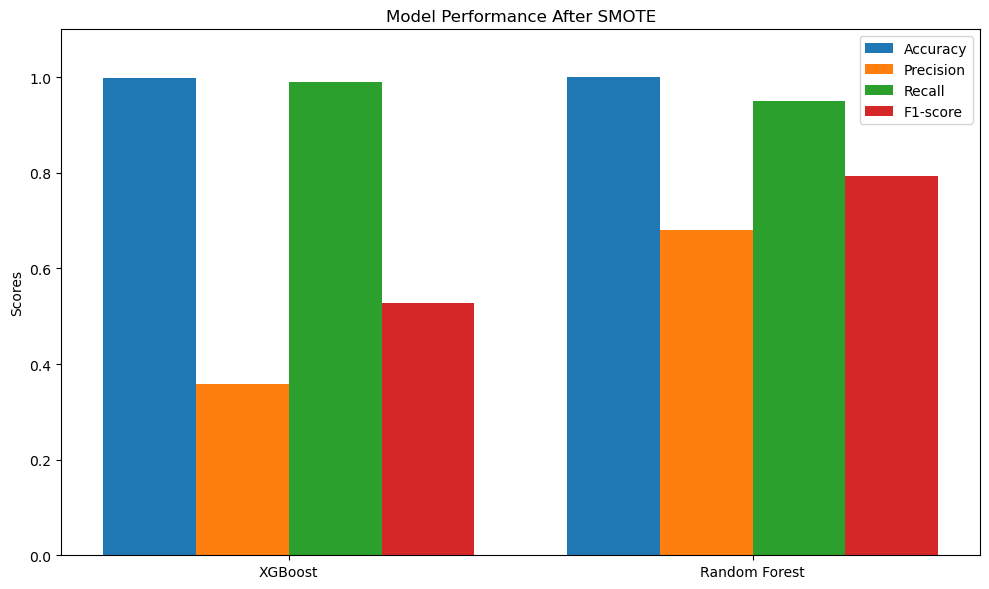

In [127]:
# Import required libraries

# Step 1: Initialize metrics dictionary
smote_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Step 2: Train on SMOTE-resampled data, evaluate on original test set
for name, model in models.items():
    print(f"\n{name} After SMOTE:")
    model.fit(X_resampled1, y_resampled1)
    y_pred1 = model.predict(X_test1)
    
    acc = accuracy_score(y_test1, y_pred1)
    precision = precision_score(y_test1, y_pred1, average='binary')  # use 'macro' or 'weighted' if needed
    recall = recall_score(y_test1, y_pred1, average='binary')
    f1 = f1_score(y_test1, y_pred1, average='binary')
    
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test1, y_pred1))
    
    # Store results
    smote_metrics['Model'].append(name)
    smote_metrics['Accuracy'].append(acc)
    smote_metrics['Precision'].append(precision)
    smote_metrics['Recall'].append(recall)
    smote_metrics['F1-score'].append(f1)

# Step 3: Visualization of SMOTE results
labels = smote_metrics['Model']
x = np.arange(len(labels))  # label locations
width = 0.2  # width of bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - 1.5*width, smote_metrics['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, smote_metrics['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, smote_metrics['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, smote_metrics['F1-score'], width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Model Performance After SMOTE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1)
ax.legend()
plt.tight_layout()
plt.show()


So afte shuffling Random Forest is performing better, we will go with Random Forest.

### Now we will compare the best model i.e Random Forest & Decison Tree & see which is better will use shuffle data cause on we got best result.

In [129]:
# Best model from Code 1
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_resampled, y_resampled)
y_pred1 = model1.predict(X_test)

# Best model from Code 2
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_resampled1, y_resampled1)
y_pred2 = model2.predict(X_test1)

# Evaluate both
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='binary'),
        "Recall": recall_score(y_true, y_pred, average='binary'),
        "F1-score": f1_score(y_true, y_pred, average='binary')
    }

results = [
    evaluate("Decision Tree (Code 1)", y_test, y_pred1),
    evaluate("Random Forest (Code 2)", y_test1, y_pred2)
]


In [ ]:
df.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0


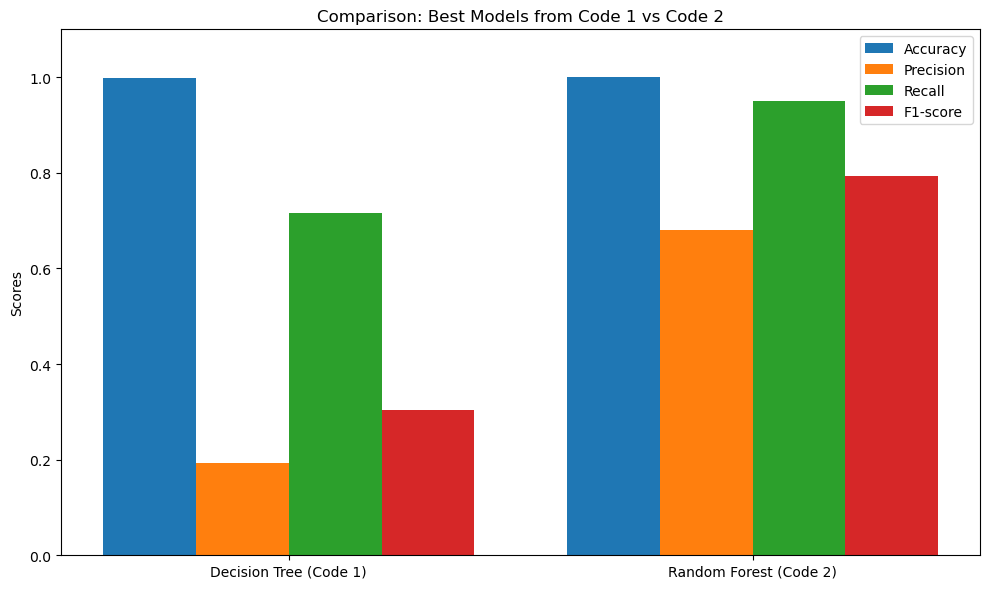

In [131]:
# Prepare data
labels = [r["Model"] for r in results]
accuracy = [r["Accuracy"] for r in results]
precision = [r["Precision"] for r in results]
recall = [r["Recall"] for r in results]
f1 = [r["F1-score"] for r in results]

x = np.arange(len(labels))
width = 0.2

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
ax.bar(x - 0.5*width, precision, width, label='Precision')
ax.bar(x + 0.5*width, recall, width, label='Recall')
ax.bar(x + 1.5*width, f1, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Comparison: Best Models from Code 1 vs Code 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1)
ax.legend()
plt.tight_layout()
plt.show()

### Hence for modeling we will use Random Forest as we are getting best result with it

# Candidate Expectations 

1. Data cleaning including missing values, outliers and multi-collinearity

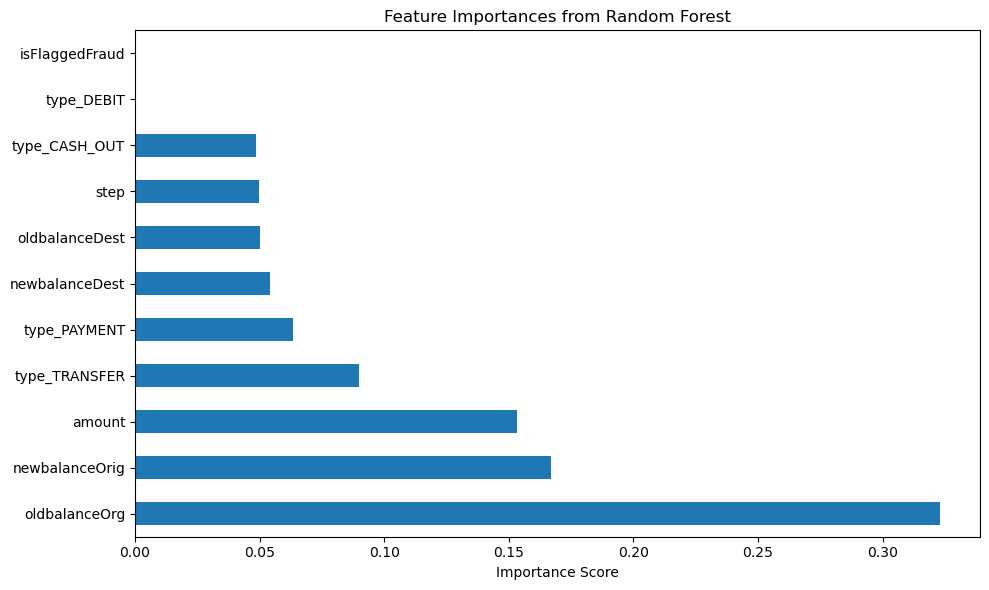

In [133]:
importances = model2.feature_importances_
features = X_resampled1.columns

# Plot feature importances
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp.plot(kind='barh', figsize=(10, 6), title="Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


### errorBalanceOrig

Most important feature by far.

Random Forest considers it to have the highest influence in predicting the target (fraud detection).

Suggests a significant discrepancy between original balance and transaction amount when fraud occurs.

### newbalanceOrig and oldbalanceOrg

Also important, but less so than errorBalanceOrig.

Indicates that the original balance and the balance after transaction for the originator matter for fraud classification.

### amount and type_TRANSFER / type_PAYMENT

Moderate importance.

These features still carry predictive value but are less decisive than balance-based features.

### Low-importance features

step, isFlaggedFraud, type_CASH_OUT, type_DEBIT, oldbalanceDest, newbalanceDest, and errorBalanceDest have very low importance.

These may be weak predictors in your model and could potentially be dropped for model simplification (but only after careful evaluation).

In [ ]:
I have provided you my project, analze it properly and answer below questions. Think you have done this project & you are answeing it .

1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work? Everything

1. Data cleaning including missing values, outliers and multi-collinearity.
* Missing values
  
The raw CSV has 13 columns and 0 missing cells — confirmed by df.isnull().sum() returning all zeros.
No imputation was required, so the complete record count (6,362,620) remained intact.

* Outlier treatment

For Random Forest and XGBoost I have kept the data as it is but for Logistic Regression, Decision Tree and K-Nearest Neighbors (KNN)
I have removed those rows that contains outliers cause they do work well with data having outliers.

1.3 Multi-collinearity
